In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pet_df = pd.read_csv("Animal_Shelter_Intake_and_Outcome.csv")

pet_df.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,CUPCAKE,DOG,MALTESE/POODLE TOY,WHITE,Spayed,TOY,10/06/2014,K23-045263,DA04,A328255,...,FIELD,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,95441.0,"95441(38.70854, -122.90737)",1
1,NaN,CAT,DOMESTIC SH,BLACK,Unknown,KITTN,NaN,K23-046275,RECEIVING,A420799,...,OVER THE COUNTER,TRANSFER,PETLUMA PP,UNKNOWN,HEALTHY,COUNTY,*PETALUMA,94952.0,"94952(38.237, -122.640695)",1
2,SYLVESTER,CAT,DOMESTIC LH,BLACK/WHITE,Neutered,SMALL,09/29/2013,K23-046271,CS05,A420773,...,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_MCHIP,HEALTHY,HEALTHY,COUNTY,OUT OF COUNTY,94901.0,"94901(37.9702346, -122.5260879)",1
3,NaN,CAT,DOMESTIC SH,BRN TABBY,Male,KITTN,08/15/2023,K23-046281,CI01,A420810,...,OVER THE COUNTER,TRANSFER,HSSC,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
4,*TESS,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,KITTN,05/07/2023,K23-044867,LOBBY,A417889,...,OVER THE COUNTER,ADOPTION,WALKIN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95404.0,"95404(38.44511, -122.708)",1


In [2]:
pet_df["Sex"].unique()

array(['Spayed', 'Unknown', 'Neutered', 'Male', 'Female'], dtype=object)

In [3]:
pet_df["Type"].unique()
cat_df = pet_df.loc[pet_df["Type"] == 'CAT']
cat_df.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
1,NaN,CAT,DOMESTIC SH,BLACK,Unknown,KITTN,NaN,K23-046275,RECEIVING,A420799,...,OVER THE COUNTER,TRANSFER,PETLUMA PP,UNKNOWN,HEALTHY,COUNTY,*PETALUMA,94952.0,"94952(38.237, -122.640695)",1
2,SYLVESTER,CAT,DOMESTIC LH,BLACK/WHITE,Neutered,SMALL,09/29/2013,K23-046271,CS05,A420773,...,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_MCHIP,HEALTHY,HEALTHY,COUNTY,OUT OF COUNTY,94901.0,"94901(37.9702346, -122.5260879)",1
3,NaN,CAT,DOMESTIC SH,BRN TABBY,Male,KITTN,08/15/2023,K23-046281,CI01,A420810,...,OVER THE COUNTER,TRANSFER,HSSC,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
4,*TESS,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,KITTN,05/07/2023,K23-044867,LOBBY,A417889,...,OVER THE COUNTER,ADOPTION,WALKIN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95404.0,"95404(38.44511, -122.708)",1
5,MIU,CAT,DOMESTIC SH,BRN TABBY/WHITE,Female,SMALL,07/15/2012,K23-045417,CS06,A419086,...,OVER THE COUNTER,TRANSFER,FORGOTTEN,UNKNOWN,TREATABLE/MANAGEABLE,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.47164440000006, -122.7398255)",1


In [4]:
cat_df = cat_df.dropna()
colors = cat_df["Color"].unique()
cDict = {}
oDict = {}
for c in colors:
    n = cat_df["Color"].value_counts()[c]
    cDict.update({c : n})

cSort = dict(sorted(cDict.items(), key = lambda item: item[1], reverse=True))
cSort

{'BRN TABBY': 739,
 'BLACK/WHITE': 657,
 'BLACK': 608,
 'BRN TABBY/WHITE': 405,
 'GRAY TABBY': 253,
 'ORG TABBY': 222,
 'GRAY/WHITE': 204,
 'GRAY': 202,
 'TORTIE': 169,
 'LYNX PT': 127,
 'CALICO': 120,
 'WHITE/BLACK': 96,
 'GRAY TABBY/WHITE': 93,
 'SEAL PT': 91,
 'ORG TABBY/WHITE': 76,
 'BUFF': 52,
 'ORANGE': 46,
 'ORANGE/WHITE': 42,
 'WHITE/BRN TABBY': 41,
 'WHITE/GRAY': 40,
 'WHITE': 40,
 'BLK TABBY': 38,
 'FLAME PT': 32,
 'BLUE CREAM/TORTIE': 32,
 'BUFF/WHITE': 29,
 'BLUE CREAM': 25,
 'BRN TABBY/TORTIE': 24,
 'CALICO/WHITE': 21,
 'TORTIE/WHITE': 18,
 'TORTIE/BRN TABBY': 18,
 'BLUE PT': 17,
 'BLK SMOKE': 16,
 'LILAC PT': 15,
 'SEAL PT/WHITE': 13,
 'SLVR TABBY': 12,
 'TORTIE PT': 11,
 'BLK TABBY/WHITE': 10,
 'BLUE': 8,
 'BLUE CREAM/CALICO': 8,
 'CALICO/BRN TABBY': 7,
 'BLUE CREAM/WHITE': 7,
 'BROWN': 7,
 'CHOCOLATE': 6,
 'BRN TABBY/CALICO': 6,
 'WHITE/BROWN': 6,
 'WHITE/ORG TABBY': 6,
 'GRAY TABBY/TORTIE': 5,
 'CALICO PT': 5,
 'CHOCOLATE/WHITE': 5,
 'WHITE/ORANGE': 4,
 'WHITE/CALICO':

In [5]:
tmp = {'COLOR' : cSort.keys(), 'COUNT' : cSort.values()}
cat_agg = pd.DataFrame(data = tmp)

for i in cat_df["Outcome Type"].unique():
    cat_agg[i] = 0
cat_agg.head()

,COLOR,COUNT,RETURN TO OWNER,ADOPTION,TRANSFER,EUTHANIZE,DISPOSAL,RTOS,DIED,ESCAPED/STOLEN
0,BRN TABBY,739,0,0,0,0,0,0,0,0
1,BLACK/WHITE,657,0,0,0,0,0,0,0,0
2,BLACK,608,0,0,0,0,0,0,0,0
3,BRN TABBY/WHITE,405,0,0,0,0,0,0,0,0
4,GRAY TABBY,253,0,0,0,0,0,0,0,0


In [6]:
alive = ['RETURN TO OWNER', 'ADOPTION']#, 'RTOS']
death = {'DISPOSAL' : 0, 'EUTHANIZE' : 0, 'DIED' : 0}
other = {'ESCAPED/STOLEN' : 0, 'TRANSFER' : 0}

for c in colors:
    c_tmp = cat_df.loc[cat_df["Color"] == c]
    i = cat_agg.index[cat_agg["COLOR"] == c]
    #print(cat_agg["COLOR"][i])
    for o in c_tmp["Outcome Type"].unique():
        #cat_agg.loc[c][o] = c_tmp[o].value_counts()[c]
        cat_agg[o][i] = c_tmp['Outcome Type'].value_counts()[o]
        
display(cat_agg)


,COLOR,COUNT,RETURN TO OWNER,ADOPTION,TRANSFER,EUTHANIZE,DISPOSAL,RTOS,DIED,ESCAPED/STOLEN
0,BRN TABBY,739,80,569,85,4,1,0,0,0
1,BLACK/WHITE,657,49,524,73,10,0,0,1,0
2,BLACK,608,61,464,71,7,2,2,1,0
3,BRN TABBY/WHITE,405,36,338,28,2,0,1,0,0
4,GRAY TABBY,253,32,187,27,3,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...
112,WHITE/BLK TABBY,1,0,0,1,0,0,0,0,0
113,BRN TIGER,1,0,1,0,0,0,0,0,0
114,CREAM/TAN,1,0,1,0,0,0,0,0,0
115,BRN TABBY/GRAY,1,0,1,0,0,0,0,0,0


<Axes: title={'center': 'Cat Outcome by Fur Color'}, xlabel='COLOR'>

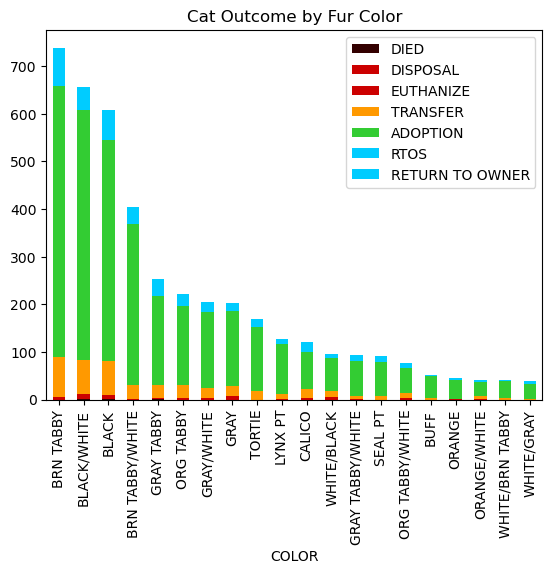

In [7]:
import matplotlib.pyplot as plt
import numpy as np

num = 20
topClrs = cat_agg.head(num)[['COLOR', 'DIED', 'DISPOSAL', 'EUTHANIZE', 'TRANSFER', 'ADOPTION', 'RTOS', 'RETURN TO OWNER']]

topClrs.plot.bar(x='COLOR', stacked=True, title="Cat Outcome by Fur Color", color = ["#330000", "#cc0000", "#cc0000", "#ff9900", "#33cc33", "#00ccff", "#00ccff"])

In [8]:
cat_df.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
2,SYLVESTER,CAT,DOMESTIC LH,BLACK/WHITE,Neutered,SMALL,09/29/2013,K23-046271,CS05,A420773,...,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_MCHIP,HEALTHY,HEALTHY,COUNTY,OUT OF COUNTY,94901.0,"94901(37.9702346, -122.5260879)",1
4,*TESS,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,KITTN,05/07/2023,K23-044867,LOBBY,A417889,...,OVER THE COUNTER,ADOPTION,WALKIN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95404.0,"95404(38.44511, -122.708)",1
5,MIU,CAT,DOMESTIC SH,BRN TABBY/WHITE,Female,SMALL,07/15/2012,K23-045417,CS06,A419086,...,OVER THE COUNTER,TRANSFER,FORGOTTEN,UNKNOWN,TREATABLE/MANAGEABLE,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.47164440000006, -122.7398255)",1
11,KITTY,CAT,DOMESTIC SH,BLACK,Neutered,SMALL,08/10/2010,K23-045239,SMM,A418762,...,FIELD,TRANSFER,FORGOTTEN,UNKNOWN,TREATABLE/MANAGEABLE,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.47164440000006, -122.7398255)",1
15,*MITEY MOUSE,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,05/22/2023,K23-045015,LOBBY,A418221,...,OVER THE COUNTER,ADOPTION,WALKIN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95404.0,"95404(38.44511, -122.708)",1


In [9]:
import datetime
from datetime import datetime

f = lambda x: datetime.strptime(x, '%m/%d/%Y')
bDt = cat_df["Date Of Birth"].apply(f)
oDt = cat_df["Outcome Date"].apply(f)

cat_df["Age"] = oDt-bDt
cat_df["Age"] = cat_df["Age"].dt.days

display(cat_df.sort_values(by=['Age']) )

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count,Age
19577,HSSC ID #28090,CAT,DOMESTIC SH,GRAY TABBY,Unknown,KITTN,09/26/2022,K22-042639,HSSC,A413426,...,TRANSFER,HSSC,UNKNOWN,PENDING,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1,1
26250,ID #26761,CAT,DOMESTIC SH,BRN TABBY,Unknown,KITTN,07/28/2023,K23-045629,HSSC,A419478,...,TRANSFER,HSSC,TREATABLE/REHAB,TREATABLE/REHAB,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1,7
23174,ID #26762,CAT,DOMESTIC SH,BRN TABBY,Unknown,KITTN,07/28/2023,K23-045630,HSSC,A419479,...,TRANSFER,HSSC,TREATABLE/REHAB,TREATABLE/REHAB,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1,7
24421,ID #26763,CAT,DOMESTIC SH,BRN TABBY,Unknown,KITTN,07/28/2023,K23-045631,HSSC,A419480,...,TRANSFER,HSSC,TREATABLE/REHAB,TREATABLE/REHAB,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1,7
4833,ID #29768,CAT,DOMESTIC SH,TORTIE,Female,KITTN,07/28/2023,K23-045624,HSSC,A419473,...,TRANSFER,HSSC,TREATABLE/REHAB,TREATABLE/REHAB,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15524,LACY,CAT,DOMESTIC MH,GRAY TABBY,Spayed,SMALL,02/15/2002,K22-042304,CS06,A415463,...,RETURN TO OWNER,OVER THE COUNTER_WALKIN,UNKNOWN,TREATABLE/MANAGEABLE,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.47164440000006, -122.7398255)",1,7505
24217,LACY,CAT,DOMESTIC MH,GRAY TABBY,Spayed,SMALL,02/15/2002,K23-043819,SMM,A415463,...,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.47164440000006, -122.7398255)",1,7670
23705,KEEK - GAY BALL,CAT,DOMESTIC LH,GRAY TABBY/WHITE,Neutered,SMALL,08/17/1996,K18-029489,SMM,A375397,...,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,TREATABLE/MANAGEABLE,SANTA ROSA,SANTA ROSA,95409.0,"95409(38.46382, -122.67058)",1,8035
21551,PRECIOUS,CAT,DOMESTIC MH,GRAY,Neutered,MED,04/28/1992,K15-013693,SMM,A295445,...,RETURN TO OWNER,OVER THE COUNTER_WALKIN,TREATABLE/MANAGEABLE,HEALTHY,COUNTY,COUNTY,95436.0,"95436(38.47872000000007, -122.890155)",1,8400


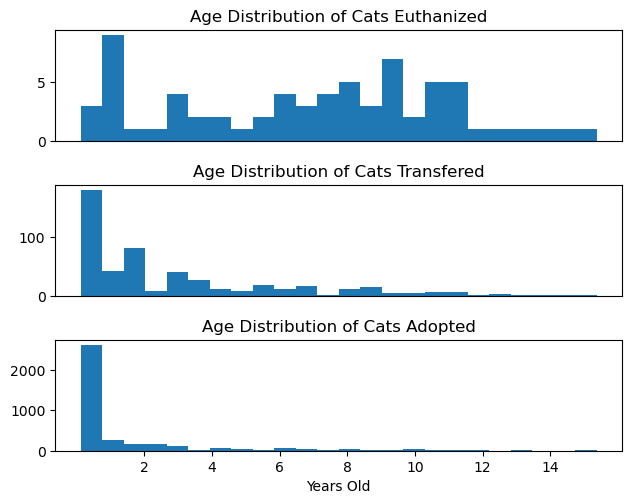

In [10]:
n_bins = 24
fig, axs = plt.subplots(3, 1)
fig.tight_layout()


cat_deathRate = cat_df[cat_df["Outcome Type"] == "EUTHANIZE"][['Age']]
axs[0].hist(cat_deathRate["Age"], bins = n_bins)
axs[0].set_title("Age Distribution of Cats Euthanized")
axs[0].get_xaxis().set_ticks([])

cat_transRate = cat_df[cat_df["Outcome Type"] == "TRANSFER"][['Age']]
axs[1].hist(cat_transRate["Age"], bins = n_bins)
axs[1].set_title("Age Distribution of Cats Transfered")
axs[1].get_xaxis().set_ticks([])


cat_adoptRate = cat_df[cat_df["Outcome Type"] == "ADOPTION"][['Age']]
axs[2].hist(cat_adoptRate["Age"], bins = n_bins)
axs[2].set_title("Age Distribution of Cats Adopted")
axs[2].get_xaxis().set_ticks([730,1460,2190, 2920, 3650, 4380, 5110], [2, 4, 6, 8, 10, 12, 14])
axs[2].set_xlabel("Years Old")


plt.show()


In [11]:
print(cat_df["Outcome Type"].unique())

['RETURN TO OWNER' 'ADOPTION' 'TRANSFER' 'EUTHANIZE' 'DISPOSAL' 'RTOS'
 'DIED' 'ESCAPED/STOLEN']


In [14]:
cat_trans = cat_df[cat_df["Outcome Type"] == "TRANSFER"]

f = lambda x: datetime.strptime(x, '%m/%d/%Y')
dtIn = cat_trans["Intake Date"].apply(f)
dtOut = cat_trans["Outcome Date"].apply(f)

cat_trans["Time In"] = dtOut-dtIn
cat_trans["Time In"] = cat_trans["Time In"].dt.days

cat_trans.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count,Age,Time In
5,MIU,CAT,DOMESTIC SH,BRN TABBY/WHITE,Female,SMALL,07/15/2012,K23-045417,CS06,A419086,...,FORGOTTEN,UNKNOWN,TREATABLE/MANAGEABLE,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.47164440000006, -122.7398255)",1,4041,24
11,KITTY,CAT,DOMESTIC SH,BLACK,Neutered,SMALL,08/10/2010,K23-045239,SMM,A418762,...,FORGOTTEN,UNKNOWN,TREATABLE/MANAGEABLE,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.47164440000006, -122.7398255)",1,4746,38
16,STORMI,CAT,DOMESTIC LH,BRN TABBY,Male,SMALL,02/12/2022,K23-045238,SMM,A418758,...,FORGOTTEN,UNKNOWN,TREATABLE/MANAGEABLE,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.47164440000006, -122.7398255)",1,542,38
38,*BRITT,CAT,DOMESTIC SH,TORTIE,Spayed,SMALL,07/18/2021,K23-045440,CA02,A419128,...,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1,753,23
43,PING,CAT,DOMESTIC SH,BLACK/WHITE,Spayed,SMALL,04/27/2018,K23-044493,CA02,A417022,...,HSSC,HEALTHY,HEALTHY,*SONOMA,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1,1931,105


In [19]:
cat_trans.describe()

,Days in Shelter,Outcome Zip Code,Count,Age,Time In
count,505.000000,505.000000,505.000000,505.000000,505.000000
mean,32.742574,95224.198020,0.996040,1179.499010,32.742574
std,33.460369,333.448409,0.062869,1370.590194,33.460369
min,0.000000,94103.000000,0.000000,1.000000,0.000000
25%,12.000000,94949.000000,1.000000,137.000000,12.000000
50%,28.000000,95407.000000,1.000000,733.000000,28.000000
75%,45.000000,95407.000000,1.000000,1550.000000,45.000000
max,421.000000,96161.000000,1.000000,6600.000000,421.000000


<Axes: ylabel='Frequency'>

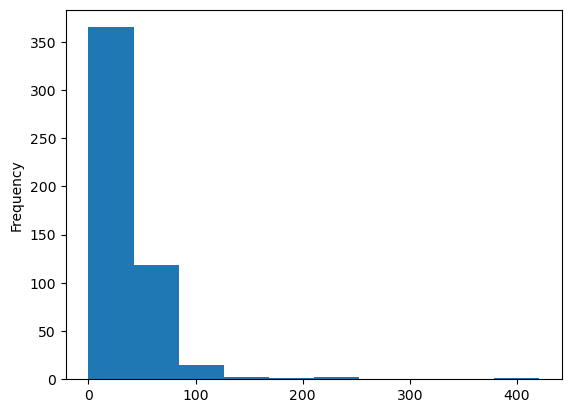

In [20]:
cat_trans["Time In"].plot.hist()